# **Pneumonix**
Pneumonix is a pneumonia detector that categorizes chest x-ray images as bacterial pneumonia, viral pneumonia, covid, or normal. This project is an extension of the previous one. The difference was instead of using transfer learning,  in this project using CNN algorithm leveraging dropout and kernel regularizer to tackle overfitting. The project data is taken from Kaggle and consists of 12000 chest x-ray images, with 3000 data for each class. The task required multiclass classification with categorical cross entropy as the loss function, Adam as the optimizer, learning rate as the hyperparameter, and accuracy as the metric. Using a learning rate of 0.0004, the training with the best results achieved 98% accuracy for train data and 90% accuracy for validation data.

# **C22-PS101**
The team  :


*   Doma Zaneta (M2200F1872)
*   Risma Faoziya (M2200F1867)
*   Irvan Aulia Luthfi (A2247J2193)
*   Natanael Halomoan Nainggolan (A2172F1713)
*   Muhammad Nur Abdi (C2247J2182)
*   Muhammad Jatmika Aryaputra (C2247J2182)

This model developed by :
Doma Zaneta and Risma Faoziya

## **Capstone Model C22-PS101**
Built with combination of CNN layers, MaxPooling layers, Flatten, Dropout, and Dense layers.

### **Dataset**
The chest x-ray images dataset from Kaggle :
https://www.kaggle.com/datasets/gibi13/pneumonia-covid19-image-dataset
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

collected to google drive :
https://drive.google.com/drive/folders/1tSfUNPvC455v7dkWWB0XxApHP6yhfu_q?usp=sharing

### **Import all libraries**

In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

### **Check the GPU**

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

### **Split The Dataset into Training and Validation Set**
Using split-folders library.

In [ ]:
# install library to split the dataset into train and validation set
# pip install split-folders

In [ ]:
# import splitfolders

### **Mount to The Google Drive**

In [ ]:
# mount gdrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Split The Dataset into Training and Validation Set**
With the ratio of 8:2.

In [ ]:
# Split into training and validation set

# src_dir = '/content/drive/My Drive/Capstone'
# output_dir = '/content/drive/My Drive/Capstone1'

# splitfolders.ratio(src_dir, output=output_dir, seed=42, ratio=(.8, .2), group_prefix=None)

Copying files: 12059 files [05:29, 36.56 files/s] 


In [ ]:
# Define the training and validation base directories
train_dir = '/content/drive/My Drive/Capstone1/train'
validation_dir = '/content/drive/My Drive/Capstone1/val'

# Directory with training normal chest x-ray
train_normal_dir = os.path.join(train_dir, 'normal')
# Directory with training covid pneumonia chest x-ray
train_covid_dir = os.path.join(train_dir,'covid')
# Directory with training bacterial pneumonia chest x-ray
train_bacterial_dir = os.path.join(train_dir,'bacterial')
# Directory with training viral pneumonia chest x-ray
train_viral_dir = os.path.join(train_dir,'viral')

# Directory with validation normal chest x-ray
val_normal_dir = os.path.join(validation_dir, 'normal')
# Directory with validation covid pneumonia chest x-ray
val_covid_dir = os.path.join(validation_dir, 'covid')
# Directory with validation bacterial pneumonia chest x-ray
val_bacterial_dir = os.path.join(validation_dir, 'bacterial')
# Directory with validation viral pneumonia chest x-ray
val_viral_dir = os.path.join(validation_dir, 'viral')

# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_normal_dir))} images of normal lungs for training.\n")
print(f"There are {len(os.listdir(train_covid_dir))} images of covid pneumonia for training.\n")
print(f"There are {len(os.listdir(train_bacterial_dir))} images of bacterial pneumonia for training.\n")
print(f"There are {len(os.listdir(train_viral_dir))} images of viral pneumonia for training.\n")

print(f"There are {len(os.listdir(val_normal_dir))} images of normal lungs for validation.\n")
print(f"There are {len(os.listdir(val_covid_dir))} images of covid pneumonia for validation.\n")
print(f"There are {len(os.listdir(val_bacterial_dir))} images of bacterial pneumonia for validation.\n")
print(f"There are {len(os.listdir(val_viral_dir))} images of viral pneumonia for validation.\n")

There are 2423 images of normal lungs for training.

There are 2400 images of covid pneumonia for training.

There are 2412 images of bacterial pneumonia for training.

There are 2411 images of viral pneumonia for training.

There are 606 images of normal lungs for validation.

There are 600 images of covid pneumonia for validation.

There are 604 images of bacterial pneumonia for validation.

There are 603 images of viral pneumonia for validation.



Sample of normal lungs image:


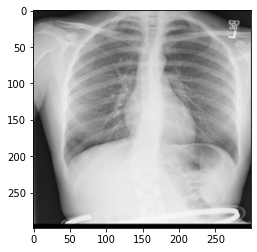


Sample of covid pneumonia image:


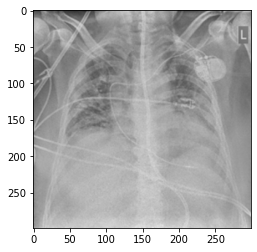

In [ ]:
print("Sample of normal lungs image:")
plt.imshow(load_img(f"{os.path.join(train_normal_dir, os.listdir(train_normal_dir)[0])}"))
plt.show()

print("\nSample of covid pneumonia image:")
plt.imshow(load_img(f"{os.path.join(train_covid_dir, os.listdir(train_covid_dir)[0])}"))
plt.show()

In [ ]:
# Load the first example of a normal lungs
sample_image  = load_img(f"{os.path.join(train_normal_dir, os.listdir(train_normal_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (299, 299, 3)


### **Data Augmentation**
Augment the train and validation data by rescale.

In [ ]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class
  # Don't forget to normalize pixel values and set arguments to augment the images
  train_datagen = ImageDataGenerator(rescale = 1./255.,
                                  #  rotation_range = 40,
                                  #  width_shift_range = 0.2,
                                  #  height_shift_range = 0.2,
                                  #  shear_range = 0.2,
                                  #  zoom_range = 0.2,
                                  #  horizontal_flip = True,
                                  #  fill_mode='nearest'
  )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=30,
                                                      class_mode='categorical',
                                                      target_size=(299, 299))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # Remember that validation data should not be augmented
  validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=30,
                                                                class_mode='categorical',
                                                                target_size=(299, 299))
  ### END CODE HERE
  return train_generator, validation_generator

### **Initiate Train and Validation Generator**

In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(train_dir, validation_dir)

Found 9646 images belonging to 4 classes.
Found 2413 images belonging to 4 classes.


### **Callback Function**

In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

### **The Model**
The model is built with combination of CNN layers, MaxPooling2D layers, Flatten, Dropout, and Dense layers.

In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(299, 299, 3)),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.7),
      tf.keras.layers.Dense(80, activation='relu'),
      tf.keras.layers.Dense(4, kernel_regularizer='l1_l2', activation='softmax')])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 297, 297, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 148, 148, 128)    0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 146, 146, 256)     295168    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 73, 73, 256)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 71, 71, 512)       1180160   
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 35, 35, 512)     

In [ ]:
# Compiling model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0004),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Training the Model
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    callbacks=callbacks)

Epoch 1/20
322/322 [==============================] - 198s 612ms/step - loss: 1.0757 - accuracy: 0.7191 - val_loss: 0.7415 - val_accuracy: 0.8106
Epoch 2/20
322/322 [==============================] - 195s 605ms/step - loss: 0.6323 - accuracy: 0.8293 - val_loss: 0.5096 - val_accuracy: 0.8492
Epoch 3/20
322/322 [==============================] - 193s 600ms/step - loss: 0.4791 - accuracy: 0.8598 - val_loss: 0.4594 - val_accuracy: 0.8512
Epoch 4/20
322/322 [==============================] - 194s 601ms/step - loss: 0.4026 - accuracy: 0.8734 - val_loss: 0.4680 - val_accuracy: 0.8272
Epoch 5/20
322/322 [==============================] - 194s 601ms/step - loss: 0.3443 - accuracy: 0.8937 - val_loss: 0.3996 - val_accuracy: 0.8761
Epoch 6/20
322/322 [==============================] - 193s 600ms/step - loss: 0.2915 - accuracy: 0.9087 - val_loss: 0.3585 - val_accuracy: 0.8856
Epoch 7/20
322/322 [==============================] - 193s 597ms/step - loss: 0.2487 - accuracy: 0.9277 - val_loss: 0.3737 -

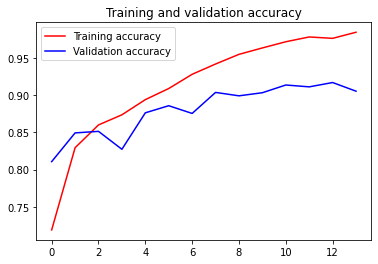

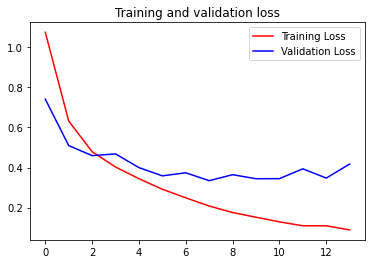

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **Save and Convert The Model**
Save the model into keras model (.h5) format, then convert it to tflite format.

In [ ]:

model.save('model.h5')
model = tf.keras.models.load_model('model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflmodel = converter.convert()
file = open('converted_model7.tflite' , 'wb')
file.write(tflmodel)

INFO:tensorflow:Assets written to: /tmp/tmp1n6uj8og/assets


381643360

Save the model into saved_model format, then convert it to tflite format.

In [ ]:
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


INFO:tensorflow:Assets written to: saved_model/1/assets


In [ ]:
# Select mode of optimization
mode = "Speed"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'converted_model8.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
model.save_weights('/content/drive/My Drive/Model_Capstone/model_1_dense_80_drop_0.25_reg_l1_l2.h5')